### 데이터 분리하기
#### 훈련에 사용되는 데이터 : train_set이라고 칭함(훈련과 평가검증에 사용)
#### 테스트에 사용되는 데이터 : test_set이라고 칭함(평가검증 및 예측에 사용)

#### 검증데이터 : 평가를 별도의 데이터로 하고자 할 경우 사용

#### 훈련셋 :  train(독립변수 : train_input, 종속변수 : train_target)
#### 테스트셋 : test(독립변수 : test_input, 종속변수 : test_target)

### fit : 훈련
### score : 검증
### predict : 예측

In [17]:
domi_len = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 
                30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 
                33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 
                39.5, 41.0, 41.0]
domi_wgt = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 
                390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 
                600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 
                685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 
                850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
bing_len = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
bing_wgt = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [18]:
# 독립변수 데이터 합치기
length = []
weight = []
length = domi_len + bing_len
#length = domi_len
#length.extend(bing_len)

weight = domi_wgt + bing_wgt
#weight = domi_wgt 
#weight.append(bing_wgt)

fish_data = []
for x,y in zip (length,weight):
    fish_data.append([x,y])

In [6]:
# 타겟데이터 생성
fish_target = [] 
fish_target = [1] * 35 + [0] * 14

In [19]:
len(fish_data), len(fish_target)

(49, 49)

### 훈련데이터와 테스트 데이터로 분리

In [28]:
# 비율없이 갯수로 우선 분리
# 훈련데이터셋 : fish_data 및 fish_target의 0부터 34개 사용
train_input = fish_data[:35]
train_target = fish_target[:35]

In [25]:
# 비율없이 갯수로 우선 분리
# 테스트 데이터셋 : fish_data 및 fish_target의 35개이후 사용
test_input = fish_data[35:]
test_target = fish_target[35:]

In [29]:
len(train_input)

35

### 샘플링 편향
#### 정확도가 0%에 가깝게 나오는 경우에 주로 나타나는 현상
#### 훈련데이터와 테스트데이터 분류시에 특정 종속변수와 특성 데이터들이 몰려 있는 현상
#### 보통 훈련데이터를 기준으로 하기 때문에 훈련데이터 편향 현상이 나타났다고 칭함

#### 샘플링 편향을 막기위한 방법
#### 데이터를 분류하기 전에 데이터의 행들을 위/아래로 섞어줌
#### 섞는다는 의미로 편향을 해소한다라고 칭함

In [ ]:
# 훈련 :  이웃의 갯수는 기본값
# 훈련에 사용하는 데이터 : train 데이터셋
# 정확도 확인
# 정확도에 사용하는 데이터 : test 데이터 셋

In [30]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN()

In [31]:
# 훈련
knn.fit(train_input,train_target)

KNeighborsClassifier()

In [32]:
# 정확도 확인
knn.score(test_input,test_target)

0.0

### 데이터 편향 해소하기
#### 넘파이 함수 사용
#### 리스트데이터를 넘파이 배열로 변환

In [38]:
import numpy as np

In [46]:
# 파이썬 기본 타입 list를 넘파이의 배열 array()로 변환
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [42]:
print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [47]:
# 배열의 차원 확인
print(input_arr.shape)
print(target_arr.shape)

(49, 2)
(49,)


In [49]:
print(target_arr)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


### 데이터를 랜덤하게 섞기
#### 넘파이의 random사용

In [59]:
# 랜덤값 고정
np.random.seed(42)

index = np.arange(49)
print('섞기 전 :',index)

# index데이터 섞기 : shuffle()함수 사용
np.random.shuffle(index)
print('섞은 후 :',index)

섞기 전 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]
섞은 후 : [13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [63]:
# 훈련데이터셋 생성
train_input = input_arr[index[0:35]]
train_target = target_arr[index[0:35]]

In [65]:
train_input.shape, train_target.shape

((35, 2), (35,))

In [66]:
# 테스트데이터셋 생성
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]
test_input.shape, test_target.shape

((14, 2), (14,))

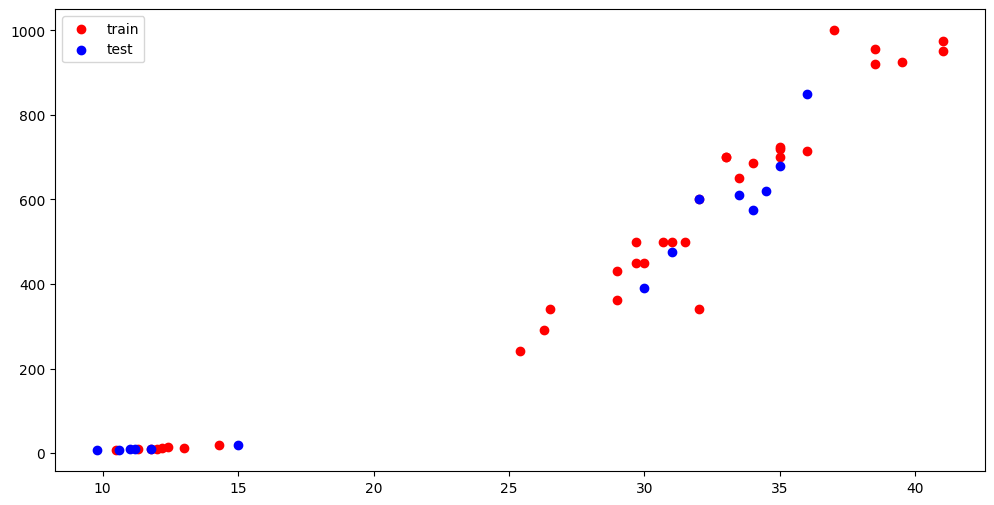

In [72]:
# 훈련 및 테스트데이터를 산점도로 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))

# 첫번째열은 길이 두번째열은 무게
plt.scatter(train_input[: , 0],train_input[:,1], color='red', label = 'train')
plt.scatter(test_input[: , 0],test_input[:, 1], color='blue', label = 'test')
plt.legend()
plt.show()

### 섞은 데이터로 훈련, 정확도, 예측하기

In [81]:
# 패키지 가져오기
from sklearn.neighbors import KNeighborsClassifier as KNN

In [82]:
# 모델생성
knnspl = KNN()

In [83]:
# 훈련시키기(훈련데이터 이용)
knnspl.fit(train_input, train_target)

KNeighborsClassifier()

In [85]:
# 정확도 확인(테스트데이터 이용)
knnspl.score(test_input, test_target)

1.0

In [80]:
# 예측하기(테스트데이터 이용)

In [88]:
knnspl.predict(test_input), test_target

(array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0]),
 array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0]))

In [75]:
train_input.shape, train_target.shape, test_input.shape, test_target.shape

((35, 2), (35,), (14, 2), (14,))